# Plotting with matplotlib



Housekeeping:
+ Next week will be a in-class problem session. Bring a laptop and we'll work on problems in groups.
+ Course project is coming up: your task will be to carry out a scientific computing task of your choice using python. I'll post a "rubric" as well as some options to give you an idea of the types of projects that could be options. You'll need to have a plan for your project when you turn in hw 8.


## Installing matplotlib

Jupyter notebooks should already come installed with matplotlib. Otherwise, one can execute the commands 

```
pip install matplotlib
```

to install a working copy of matplotlib. 


Some other plotting tools to use 
+ `mplot3d` for 3D plotting requirements
+ `seaborn` for statistical data visualization.

Both these tools are based on `matplotlib` but `seaborn` requires additional installation.

Some other packages for visualization
+ `vtk` 
+ `mayavi2` 
+ `paraview`


Reading:
    
+ Chapter 5, Langtangen's "A primer on scientific programing with Python" .
+ Chapter 4, [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
+ [matplotlib website](https://matplotlib.org/)


### Preliminaries

At the start of every jupyter notebook I typically add the following plotting commands.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

These two commands are specific to jupyter notebooks
+ `%matplotlib inline` which plots static images
+ `%matplotlib notebook` which plots interactive images

Without these commands, one has to type `plt.show()` each time to display an image.


The next three commands adjust the figure size, xtick labelsize, and ytick labelsize, which make the ticks more legible. These changes are applied to every plot but can be changed at a later time.

Type `print(plt.rcParams.keys())` to see a list of parameters that we can edit.

### Example 1: Plotting simple functions

mkdir: figs: File exists
-rw-r--r--@ 1 arvindks  staff    16K Oct 24 13:19 figs/mysincos.eps


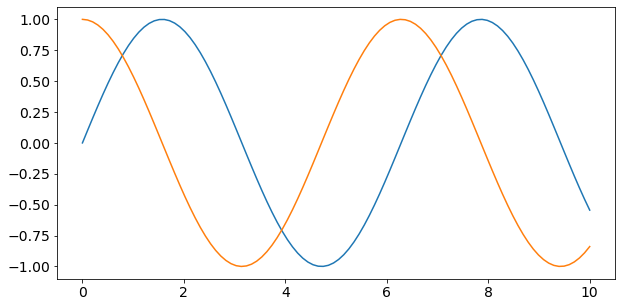

In [2]:
import numpy as np

x = np.linspace(0, 10, 100)
# print(x)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# !mkdir figs                        # Uncomment this to make the directory  
plt.savefig('figs/mysincos.eps')     # May have to first create the directory figs
!ls -lh figs/mysincos.eps




To save this image, one can use the `savefig` command. 

### Example 2: Editing the plot features

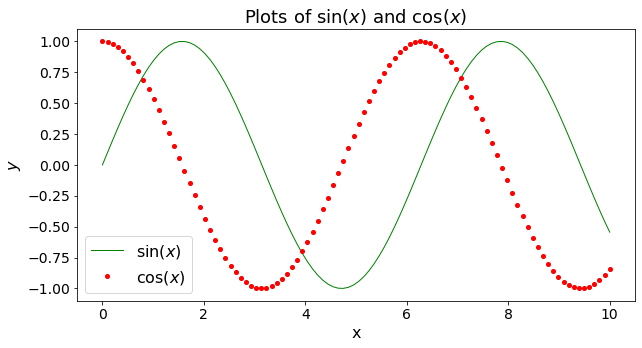

In [3]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'g-', linewidth = 1.0)
plt.plot(x, np.cos(x), 'ro', lw = 3.0, markersize = 4)

plt.xlabel('x', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)
plt.title('Plots of $\sin(x)$ and $\cos(x)$', fontsize = 18 )
plt.legend(( '$\sin(x)$','$\cos(x)$' ), fontsize = 16, loc = 'best')

### Exercise

After studying a certain type of cancer, a researcher hypothesizes that in the short run the number $(y)$ of malignant cells in a particular tissue grows exponentially with time $(t)$. That is, $y=\alpha_0 e^{\alpha_1 t}$.  The researcher records the data given below


 . | .  | .  |.   | . | . 
:--|:--|:--|:--|:--|:--
t (days) | 1 |2 | 3 | 4 | 5 
y (cells) | 16 | 27 | 45 | 74 | 122 

With some analysis, we find the coefficients of ``best'' fit
 $$ \alpha_0 = 9.7309 \qquad \alpha_1 = 0.5071. $$

+ Plot the data points (with black crosses) along with the ``best'' fit curve (as a solid red line).
+ Predict at what time the number of cells reaches $100$. Show this visually using a dashed green line. 


The plots should have the following features
+ Clearly label the x- and y-axes. All the labels should have fontsize $18$. 
+ Title the figure `Exponential line fit.' This should have fontsize $20$
+ Add a legend with three labels `Data', 'Fit', and 'Prediction'. The fontsize for the labels should be $18$. 
+ The markersize should be $10$ pts, and the line-widths should be $4$ pts. 


In [13]:
t = np.array([1,2,3,4,5])
y = np.array([16,27,45,74,122])



tfit = np.linspace(1,5,100)
yfit = 9.7303*np.exp(0.5071*tfit)

### Subplots

Consider the earlier example, now in the form of subplots.

Text(0.5, 0.98, 'Plots of sin and cos')

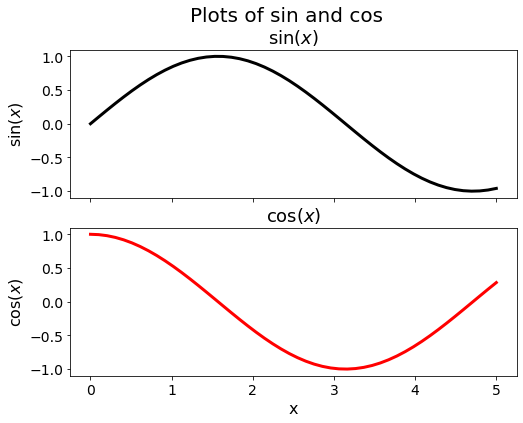

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (8,6))

#Axes 1
ax1.plot(x, np.sin(x), 'k-', lw = 3.0)
ax1.set_title('$\sin(x)$', fontsize = 18)
ax1.set_ylabel('$\sin(x)$', fontsize = 16)

#Axes 2
ax2.plot(x, np.cos(x), 'r-', lw = 3.0)
ax2.set_title('$\cos(x)$', fontsize = 18)
ax2.set_ylabel('$\cos(x)$', fontsize = 16)
ax2.set_xlabel('x', fontsize = 16)

# Title for an overall plot
f.suptitle('Plots of sin and cos', fontsize = 20)

Some features to keep in mind
+ `sharex' shares the same x-axis between the two plots. 
+ `ax1`, `ax2` are two objects that give very fine scale control over each subplot.
+ When you use axes rather than the figure you need slightly different commands. For example, note that 'xlabel' has changes to 'set_xlabel'.

We can add a grid of subplots as follows. 

Text(0.5, 0.98, 'Overall title')

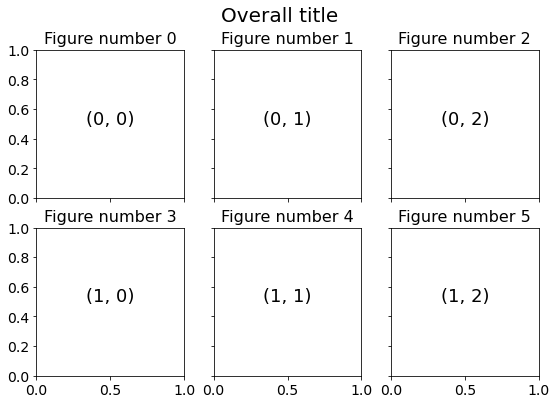

In [15]:
f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (9,6))

# We can iterate through the images 
for i in range(2):
    for j in range(3):
        axarray[i,j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
        axarray[i,j].set_title('Figure number %d' %(3*i+j), fontsize = 16)
        
f.suptitle('Overall title', fontsize = 20)

### Plotting images

There are several functions for plotting images. `imshow` is good for grayscale and color images. We can use this function with many different colormaps. Here are three examples but a longer list is available [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

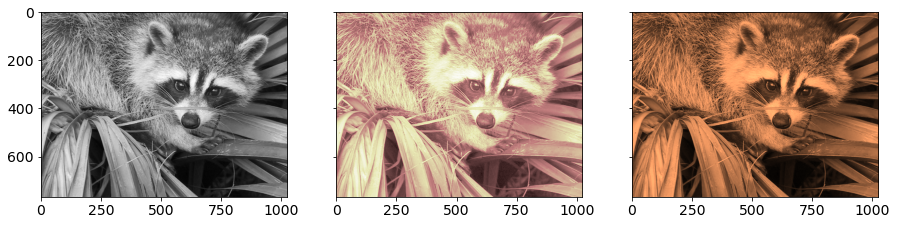

In [16]:
from scipy import misc
face = misc.face(gray=True)


f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,5))
ax1.imshow(face, cmap=plt.cm.gray)
ax2.imshow(face, cmap=plt.cm.pink)
ax3.imshow(face, cmap=plt.cm.copper)

### Histograms

Text(0.5, 1.0, 'Scatter plot')

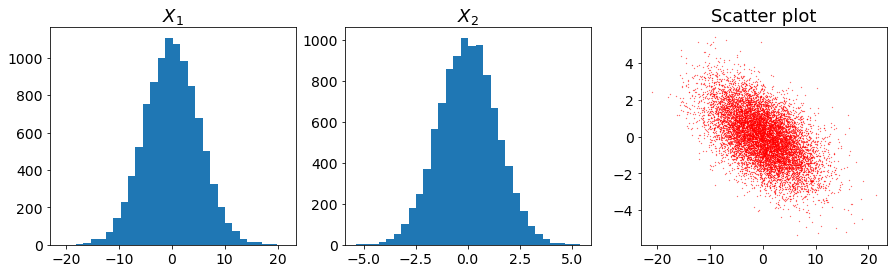

In [17]:
Y = np.random.randn(10000,2)

x = Y[:,0] + 5*Y[:,1]
y = Y[:,0] - Y[:,1]
 
f, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,4))
ax1.hist(x, bins = 30)
ax1.set_title('$X_1$', fontsize = 18)
ax2.hist(y, bins = 30)
ax2.set_title('$X_2$', fontsize = 18)
ax3.plot(x,y, '.r', markersize = 0.5)
ax3.set_title('Scatter plot', fontsize = 18)


The package `seaborn` also has excellent tools for statistical visualization.

### Visualizing two dimensional functions

Consider the following function
$$ f(x,y) = \sin^{10}(x) + \cos(10 + xy)\cos(x) \qquad x,y  =[0,5]^2.$$ 


We consider three different ways of plotting the function.

In [18]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


Text(0.5, 1.0, 'Filled contour plot')

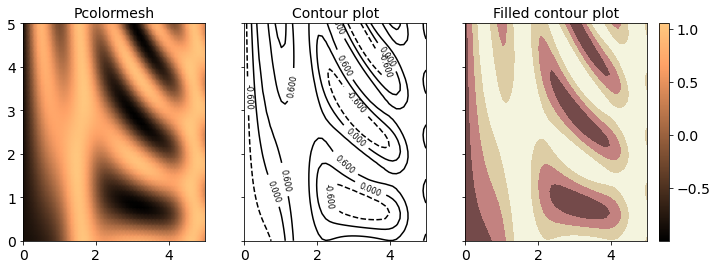

In [19]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (12,4),gridspec_kw={'width_ratios': [1, 1,1.25]})

#Pcolormesh - similar to imshow with different orientation
c1 = ax1.pcolormesh(X,Y,Z, shading = 'gouraud', cmap = plt.cm.copper)
plt.colorbar(c1,ax=ax3)
ax1.set_title('Pcolormesh', fontsize = 14)

#Contourplot
contours = ax2.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
ax2.set_title('Contour plot', fontsize = 14)

#Filled countour plot
ax3.contourf(X, Y, Z, 3, cmap = plt.cm.pink)
ax3.set_title('Filled contour plot', fontsize = 14)

### Animations

There are several options for animations

1. Save several files for each frame of the video `fig0001.png` to `fig0060.png`. Then run an animator (e.g. ImageMagick's convert).
2. Use `matplotlib.animation` tool to create a video.

MovieWriter ffmpeg unavailable; using Pillow instead.


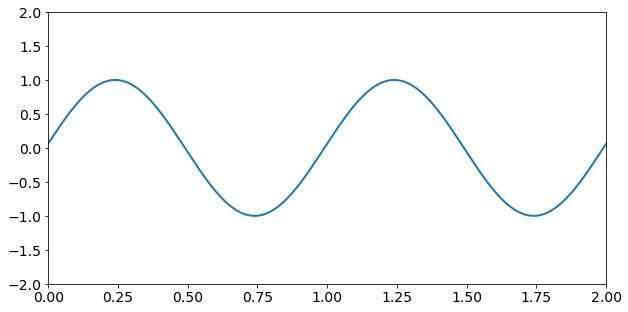

In [20]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=20, blit=True)
anim.save('figs/im.gif') #Another option is mp4
plt.show()